<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Steam-game-analysis-with-COVID-19" data-toc-modified-id="Steam-game-analysis-with-COVID-19-1">Steam game analysis with COVID-19</a></span><ul class="toc-item"><li><span><a href="#Impact-of-the-COVID-19-Pandemic-on-Consumer-Demand-and-Price-Discount-in-the-Game-Industry" data-toc-modified-id="Impact-of-the-COVID-19-Pandemic-on-Consumer-Demand-and-Price-Discount-in-the-Game-Industry-1.1">Impact of the COVID-19 Pandemic on Consumer Demand and Price Discount in the Game Industry</a></span></li><li><span><a href="#Related-literatures" data-toc-modified-id="Related-literatures-1.2">Related literatures</a></span></li><li><span><a href="#Descriptive-Analysis" data-toc-modified-id="Descriptive-Analysis-1.3">Descriptive Analysis</a></span><ul class="toc-item"><li><span><a href="#Variable-description" data-toc-modified-id="Variable-description-1.3.1">Variable description</a></span></li><li><span><a href="#Descriptive-Statistics-and-Balance-test" data-toc-modified-id="Descriptive-Statistics-and-Balance-test-1.3.2">Descriptive Statistics and Balance test</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistic-and-t-test-between-treatment-year-and-control-year-before-COVID-19-intervention" data-toc-modified-id="Descriptive-statistic-and-t-test-between-treatment-year-and-control-year-before-COVID-19-intervention-1.3.2.1">Descriptive statistic and t-test between treatment year and control year before COVID-19 intervention</a></span></li><li><span><a href="#treat,-control-group-t-test" data-toc-modified-id="treat,-control-group-t-test-1.3.2.2">treat, control group t-test</a></span></li></ul></li><li><span><a href="#Econometric-Analysis" data-toc-modified-id="Econometric-Analysis-1.3.3">Econometric Analysis</a></span></li><li><span><a href="#Parallel-trend-assumption" data-toc-modified-id="Parallel-trend-assumption-1.3.4">Parallel trend assumption</a></span></li><li><span><a href="#Effects-of-COVID-19-on-Demand-for-playing-games" data-toc-modified-id="Effects-of-COVID-19-on-Demand-for-playing-games-1.3.5">Effects of COVID-19 on Demand for playing games</a></span></li><li><span><a href="#EVENT-STUDY" data-toc-modified-id="EVENT-STUDY-1.3.6">EVENT STUDY</a></span></li><li><span><a href="#Three-way-interaction:-Impact-on-Multi-paly-game-after-COVID-19" data-toc-modified-id="Three-way-interaction:-Impact-on-Multi-paly-game-after-COVID-19-1.3.7">Three-way interaction: Impact on Multi-paly game after COVID-19</a></span></li><li><span><a href="#Three-way-interaction:-Impact-on-other-charateristics-after-COVID-19" data-toc-modified-id="Three-way-interaction:-Impact-on-other-charateristics-after-COVID-19-1.3.8">Three-way interaction: Impact on other charateristics after COVID-19</a></span></li><li><span><a href="#Effects-of-COVID-19-on-the-discount-rate-for-games" data-toc-modified-id="Effects-of-COVID-19-on-the-discount-rate-for-games-1.3.9">Effects of COVID-19 on the discount rate for games</a></span></li><li><span><a href="#Three-way-interaction-with-Discount-Rate" data-toc-modified-id="Three-way-interaction-with-Discount-Rate-1.3.10">Three-way interaction with Discount Rate</a></span><ul class="toc-item"><li><span><a href="#DID-x-discount_rate-interaction" data-toc-modified-id="DID-x-discount_rate-interaction-1.3.10.1">DID x discount_rate interaction</a></span></li></ul></li><li><span><a href="#Three-way-interaction-with-Discount-Rate-in-condition" data-toc-modified-id="Three-way-interaction-with-Discount-Rate-in-condition-1.3.11">Three-way interaction with Discount Rate in condition</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from analysis_tool import *
from basic_preprocess import *

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(["classic"])
plt.rcParams['font.family'] = 'Times New Roman'

import plotly.io as pio 
import plotly.express as px
pio.templates.default = "xgridoff"

import warnings
warnings.filterwarnings('ignore')

import researchpy # for t-test

# Steam game analysis with COVID-19

## Impact of the COVID-19 Pandemic on Consumer Demand and Price Discount in the Game Industry
 
Unlike other industries damaged by the COVID-19, the game industry is in a prosperous condition.  
This notebook is to explore the changes in game industry after COVID-19. 

`Research Questions`  

- Is there really an impact of COVID-19 on the game industry?
- Did all games benefit from the COVID-19 Lockdown policy?
- Is there a price strategy under COVID-19?
    - Any additional increase of the number of consumers by applying a price discount strategy after COVID-19?  

To answer my questions, I will analysis steam game data collected from [SteamDB](https://steamdb.info/), [Steam](https://store.steampowered.com/), and [Metacritic](https://www.metacritic.com/).  

To set the research intervention more vaild then WHO's declaration (March 11th, 2020), the [Oxford Coronavirus Government Response Tracker](https://ourworldindata.org/covid-stringency-index) will be used.


- Be more specific, I'm going to analysis only paid games to analyze price strategy along with COVID-19.
    - Data is limited, aggregated to game-level.
    - If there was individual-level and transaction data, more rich analysis could be done 

`Main findings`

- The number of game players have been increased after COVID-19.
    - Among characteristics of games, multi-playable games have the largest impact.

- The discount rate of game have been increased after COVID-19 during the non-sale period.
    - There is an additional increase of the number of players by applying a price discount strategy after COVID-19.
    - Among characteristics of games, multi-playable, big publisher, strategy, casual and simulation games have the additional effect.
        - However, multi-game’s magnitude of the additional effect was relatively small compared to other games.


## Related literatures

`Mental health and hedonic consumption`

| Researchers         | Research                                                                                                                                                                                                 |
| ------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Ettman et al (2020) | During the COVID-19 pandemic, the prevalence of depressive symptoms was more than thrice greater than before.                                                                                            |
| Garg (2019)         | Helplessness associated with sadness is responsible for increase in hedonic consumption.                                                                                                                 |
| Garg et al (2007)   | Sadness increased hedonic consumption (vs happiness)                                                                                                                                                     |
| Okada (2005)        | People want to have fun, and more likely to have fun if<br> the situation allows them to justify it. They are willing to pay more<br> in time for hedonic goods and more in money for utilitarian goods. |
| Gioia et al (2021)  | During COVID-19 lockdown, FoMO (Fear of Missing Out) levels may<br> have strengthend attitudes toward online communication.                                                                              |
| Elhai et al (2020)  | After COVID-19 lockdown, people use digital technology to conpensate for unmet social needs from FoMO(Fear of Missing Out) due to social distancing.                                                     |


- There are more depressive symptoms after COVID-19 lockdown.
- Consumers are more likely to consume hedonic products & willing to pay more in time for hedonic goods.
- There is an increase in FoMO(Fear of Missing Out) levels during COVID-19 lockdown.
- Consumer’s needs for digital technology will increase to interact with others.

- Based on literatures...`I conjecture that Games that can play with others would get the most benefit.`


`How to measure the impact?`

- setting a year before COVID-19 as control

| Researchers            | Research                                                                                                                                                                              | <br>Control group | Method                   |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------- | ------------------------ |
| Anderson et al.,(2020) | Measure the impact of COVID-19 on consumer's sepending behavior in Denmark. Finds that spending drop was larger for consumers who became unemployment due to pandemic crisis.         | A year-ago        | Differnce-in-Differences |
| Chen et al.,(2020)     | Finds spending on goods and services were both significaltly affected in China using transaction data.                                                                                | A year-ago        | Differnce-in-Differences |
| Carvalho et al.,(2020) | Measure the impact of lockdown policy due to COVID-19 on consumer's spending behavior in Spain. Finds that cancellation of lockdown policy return the consumption pattern like usual. | A year-ago        | Differnce-in-Differences |
| Sim et al.,(2020)      | Finds that unlike other area. COVID-19 outbreak significantly<br> reduced music streaming consumption.                                                                                | A year-ago        | Differnce-in-Differences |

`When is the intervention?`

- WHO's pandemic declaration is March 11th 2020.
- Although the pandemic declaration could be a useful indicator of the COVID-19 outbreak, it does not consider heterogeneity in the timing of lockdown restriction and its severity. 
- Data is allso aggregated in game-level which is a limitation for finding real control group for natural experiment analysis. 

In [2]:
covid_info = pd.read_csv("../data/additional_data/covid-stringency-index.csv")
covid_info["Day"] = pd.to_datetime(covid_info["Day"], infer_datetime_format=True)

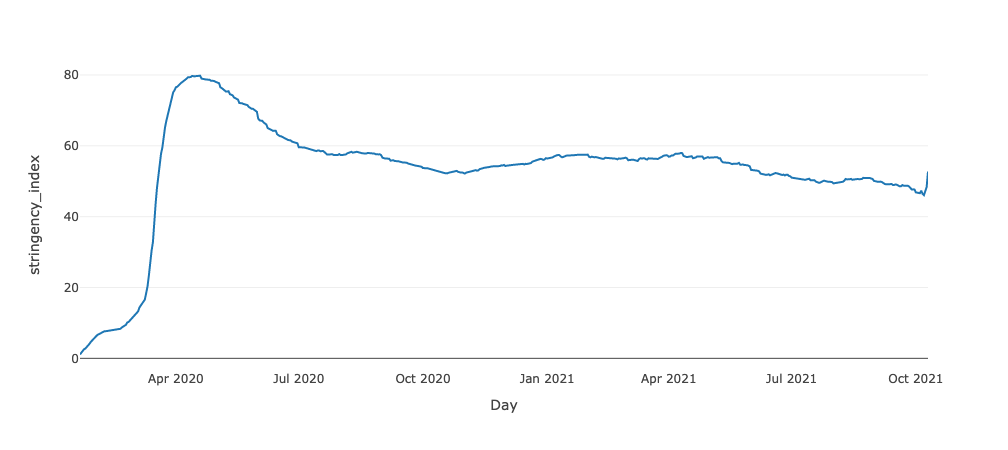

In [3]:
covid = covid_info.groupby("Day").mean().reset_index()

fig = px.line(data_frame=covid, x=covid["Day"], y=covid["stringency_index"])
fig

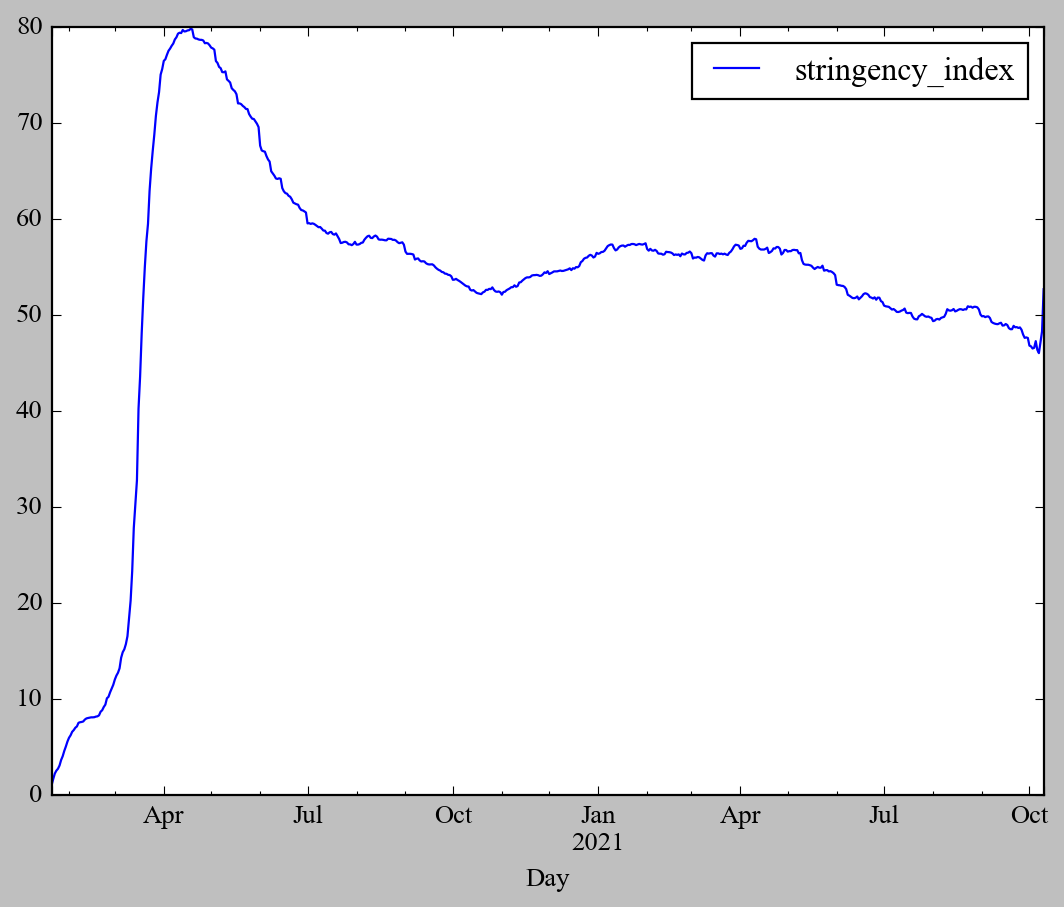

In [6]:
covid.plot(x="Day", y="stringency_index")

- Based on data, Governments started to strengthen the lockdown policy drastically from March 11th, 2020 to March 22th.
- Therefore, intervention would be March 11th, 2020 but March 12th to March 22 will be excluded as transition period.

## Descriptive Analysis

In [2]:
# load data
df_day = load_did_data("D")
df_week = load_did_data("W")

### Variable description

Variable description for econometric analysis

| Variable Description    |                                                                        |  |  |  |  |
| ----------------------- | ---------------------------------------------------------------------- |  |  |  |  |
| Treated                 | 1 if a year is the treated year, 0 otherwise                           |  |
| After                   | 1 if a day of the year is later than March 11th,2020 , and 0 otherwise |
| Number of Players       | Total number of game players for each game in each time                |
| Number of twitch viewer | Total number of twitch viewers for each game in each time              |
| Price                   | Price of each game in each time                                        |  |  |
| Discount rate           | Discount rate of each game in each time                                |  |
| Update                  | Number of updates for each game in time period                         |  |
| Number of reviews       | Number of reviews of each game in each time                            |  |
| Action                  | 1 if game's genre tagged as Action, 0 otherwise                        |  |
| Indie                   | 1 if game's genre tagged as Indie, 0 otherwise                         |  |
| Strategy                | 1 if game's genre tagged as Strategy, 0 otherwise                      |  |
| Adventure               | 1 if game's genre tagged as Adventure, 0 otherwise                     |  |
| Casual                  | 1 if game's genre tagged as Casual, 0 otherwise                        |  |
| Simulation              | 1 if game's genre tagged as Simulation, 0 otherwise                    |  |
| RPG                     | 1 if game's genre tagged as RPG, 0 otherwise                           |  |
| Multi                   | 1 if game have fuction to play with others, 0 otherwise                |
| Bigpublisher            | 1 if game was published by big company, 0 otherwise                    |  |

### Descriptive Statistics and Balance test

- This is for more convincing evidence to set a year before as control group.

#### Descriptive statistic and t-test between treatment year and control year before COVID-19 intervention

|                              | Treatment |               | Control    |               |         |
| ---------------------------- | --------- | ------------- | ---------- | ------------- | ------- |
| Variable                     | Mean      | Standard err. | Mean       | Standard err. | p-value |
| Number of Players            | 5568.5881 | 521.333882    | 6117.86039 | 915.254782    | 0.5876  |
| Number of twitch viewer      | 1612.4312 | 97.981168     | 1481.12666 | 113.493545    | 0.3787  |
| Price                        | 24.664757 | 0.255439      | 23.46904   | 0.276333      | 0.0015  |
| Discount rate                | 8.863775  | 0.252418      | 10.248954  | 0.343576      | 0.0009  |
| Update                       | 0.135083  | 0.00747       | 0.15669    | 0.00955       | 0.0709  |
| Update cumulative            | 39.335083 | 1.023145      | 36.714426  | 1.037483      | 0.0738  |
| Number of reviews            | 0.052762  | 0.007356      | 0.057573   | 0.016034      | 0.7742  |
| Number of reviews cumulative | 86.654144 | 3.703575      | 78.398757  | 3.691011      | 0.1171  |
| Review rating                | 6.613788  | 0.326243      | 7.287696   | 0.319771      | 0.1491  |
| Review rating cumulative     | 6.988499  | 0.03935       | 7.012735   | 0.043835      | 0.6815  |
| Action                       | 0.520988  | 0.024854      | 0.520231   | 0.026897      | 0.9835  |
| Indie                        | 0.37284   | 0.024058      | 0.364162   | 0.025907      | 0.8062  |
| Strategy                     | 0.308642  | 0.022982      | 0.312139   | 0.024947      | 0.9179  |
| Adventure                    | 0.288889  | 0.02255       | 0.280347   | 0.024182      | 0.7964  |
| Casual                       | 0.091358  | 0.086705      | 0.014334   | 0.01515       | 0.8238  |
| Simulation                   | 0.259259  | 0.021803      | 0.260116   | 0.023619      | 0.9788  |
| RPG                          | 0.318519  | 0.023179      | 0.309249   | 0.024883      | 0.7854  |
| Multi                        | 0.661728  | 0.023539      | 0.682081   | 0.025071      | 0.5546  |
| Bigpublisher                 | 0.345679  | 0.023661      | 0.33815    | 0.02547       | 0.8287  |

In [8]:
control_group = df_week[(df_week["Treated"] == 0) & (df_week["After"]==0)]
treat_group = df_week[(df_week["Treated"] == 1) & (df_week["After"]==0)]

u_treat_group = treat_group.drop_duplicates(["appid"])
u_control_group = control_group.drop_duplicates(["appid"])

In [9]:
time_vary_cols = ['value', 'values_twitch', 'price',
       'discount_rate','update', 'update_cum','num_of_reviews', 'rating_day_mean', 'num_of_reviews_cum',
       'rating_cum_mean']

In [10]:
cols = [  'Action', 'Indie', 'Strategy', 'Adventure', 'Casual', 'Simulation', 'RPG',
       'playwithother', 'bigpublishers']

#### treat, control group t-test

In [13]:
# quick way to see
import statsmodels.formula.api as smf

mod = smf.ols(formula='Treated ~ Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + Racing + playwithother + bigpublishers',
              data=pd.concat([u_treat_group,u_control_group]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Treated   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.06826
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               1.00
Time:                        01:57:48   Log-Likelihood:                -542.40
No. Observations:                 751   AIC:                             1107.
Df Residuals:                     740   BIC:                             1158.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5410      0.053     10.239

In [14]:
# check time varying variable in within variation
import linearmodels as lm

formula = f"Treated ~ value + market_share + price + discount_rate + 1 + EntityEffects + TimeEffects"

mod = lm.PanelOLS.from_formula(formula, data=pd.concat([treat_group,control_group]).set_index(['appid',"time_index"]), drop_absorbed=True)
res = mod.fit(cov_type='clustered')
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                Treated   R-squared:                        0.0000
Estimator:                   PanelOLS   R-squared (Between):          -7.747e-05
No. Observations:                6536   R-squared (Within):               0.0000
Date:                Sat, Nov 27 2021   R-squared (Overall):           -2.22e-16
Time:                        01:57:49   Log-likelihood                 2.242e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   2.613e+04
Entities:                         735   P-value                           0.0000
Avg Obs:                       8.8925   Distribution:                  F(4,5789)
Min Obs:                       1.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             25.430
                                        P-value                           0.0000
Time periods:                       9   Distribution:                  F(4,5789)
Avg Obs:                       726.22                                           
Min Obs:                       718.00                                           
Max Obs:                       735.00                                           
                                                                                
                               Parameter Estimates                               
=================================================================================
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept         0.5445  9.293e-17  5.859e+15     0.0000      0.5445      0.5445
value          3.681e-20  2.819e-20     1.3060     0.1916  -1.845e-20   9.207e-20
market_share  -4.035e-15  1.629e-13    -0.0248     0.9802  -3.234e-13   3.153e-13
price           8.21e-18  1.914e-18     4.2884     0.0000   4.457e-18   1.196e-17
discount_rate  4.953e-18  6.423e-19     7.7103     0.0000   3.693e-18   6.212e-18
=================================================================================

F-test for Poolability: 2.048e+31
P-value: 0.0000
Distribution: F(742,5789)

Included effects: Entity, Time
"""

In [11]:
import researchpy
# time invariant variables t-test
for col in cols:
    des, res = researchpy.ttest(u_treat_group[col], u_control_group[col],paired= False)
    print("*"*70)
    print(col)
    print(des)
    print(res)

**********************************************************************
Action
   Variable      N      Mean        SD        SE  95% Conf.  Interval
0    Action  405.0  0.520988  0.500177  0.024854   0.472128  0.569847
1    Action  346.0  0.520231  0.500314  0.026897   0.467328  0.573134
2  combined  751.0  0.520639  0.499907  0.018242   0.484828  0.556450
                Independent t-test   results
0  Difference (Action - Action) =     0.0008
1            Degrees of freedom =   749.0000
2                             t =     0.0207
3         Two side test p value =     0.9835
4        Difference < 0 p value =     0.5082
5        Difference > 0 p value =     0.4918
6                     Cohen's d =     0.0015
7                     Hedge's g =     0.0015
8                 Glass's delta =     0.0015
9                   Pearson's r =     0.0008
**********************************************************************
Indie
   Variable      N      Mean        SD        SE  95% Conf.  Interval


In [12]:
import researchpy
# time variant variables simple t-test without consideration
for col in time_vary_cols:
    des, res = researchpy.ttest(treat_group[col], control_group[col],paired= False)
    print("*"*50)
    print(col)
    print(des)
    print(res)

**************************************************
value
   Variable       N         Mean            SD          SE    95% Conf.  \
0     value  3559.0  5568.588110  31101.400469  521.333882  4546.444765   
1     value  2977.0  6117.860394  49938.032079  915.254782  4323.264112   
2  combined  6536.0  5818.769198  40772.385837  504.324543  4830.128149   

      Interval  
0  6590.731455  
1  7912.456676  
2  6807.410247  
              Independent t-test    results
0  Difference (value - value) =   -549.2723
1          Degrees of freedom =   6534.0000
2                           t =     -0.5424
3       Two side test p value =      0.5876
4      Difference < 0 p value =      0.2938
5      Difference > 0 p value =      0.7062
6                   Cohen's d =     -0.0135
7                   Hedge's g =     -0.0135
8               Glass's delta =     -0.0177
9                 Pearson's r =      0.0067
**************************************************
values_twitch
        Variable       N 

### Econometric Analysis

set bandwidths (research periods) for analysis

In [3]:
# daily data bandwidths
band1_D_c = get_time_index(df_day,"time","2019-02-20","2019-04-13")
band1_D_t = get_time_index(df_day,"time","2020-02-19","2020-04-11")
band1_D = pd.concat([band1_D_c,band1_D_t], axis = 0)

band2_D_c = get_time_index(df_day,"time","2019-02-13","2019-04-20")
band2_D_t = get_time_index(df_day,"time","2020-02-12","2020-04-18")
band2_D = pd.concat([band2_D_c,band2_D_t], axis = 0)

band3_D_c = get_time_index(df_day,"time","2019-02-06","2019-04-27")
band3_D_t = get_time_index(df_day,"time","2020-02-05","2020-04-25")
band3_D = pd.concat([band3_D_c,band3_D_t], axis = 0)

### Parallel trend assumption 

`Discount Rate`  

Except that periodical sale (new year sale) seems little bit off the date, pre-period seems have similar pattern

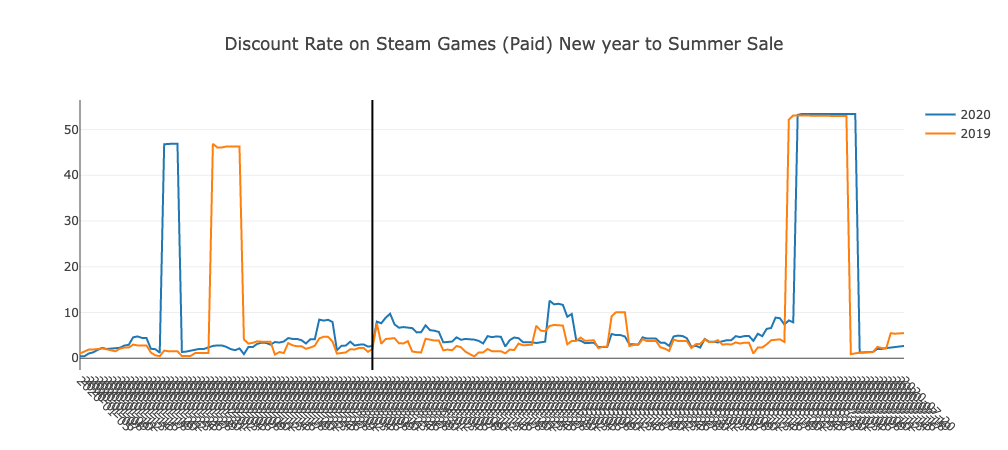

In [20]:
band_D_c = get_time_index(df_day,"time","2019-01-06","2019-07-22")
band_D_t = get_time_index(df_day,"time","2020-01-05","2020-07-20")
band_D = pd.concat([band1_D_c,band1_D_t], axis = 0)

treat_agg = band_D_t.groupby("time").mean().reset_index()
control_agg = band_D_c.groupby("time").mean().reset_index()
fig = px.line(title="Discount Rate on Steam Games (Paid) New year to Summer Sale")
fig.add_scatter(x = treat_agg["time_index"], y = treat_agg["discount_rate"], mode="lines",name="2020")
fig.add_scatter(x = control_agg["time_index"], y = control_agg["discount_rate"], mode="lines",name="2019")
fig.add_vline(x=66, name="COVID-19")

fig.update_xaxes(
    ticktext=list(treat_agg["time"].astype(str)),
    tickvals=list(treat_agg["time_index"]),
    tickangle=45
)

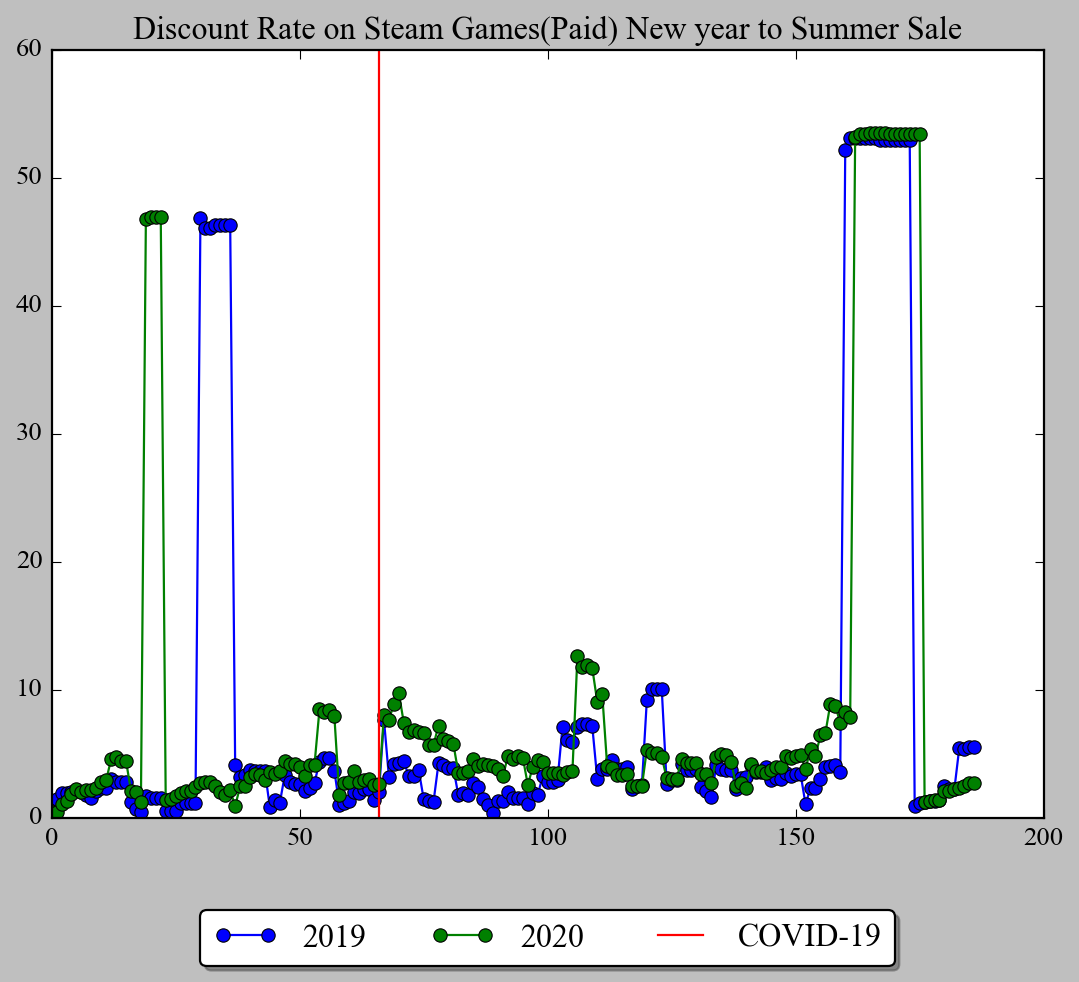

In [21]:
trend = draw_lineplots(control_agg,treat_agg, label=["2019","2020"],
                       title="Discount Rate on Steam Games(Paid) New year to Summer Sale",
                       dx="time_index",dy="discount_rate", vline=[66,"r","COVID-19"])

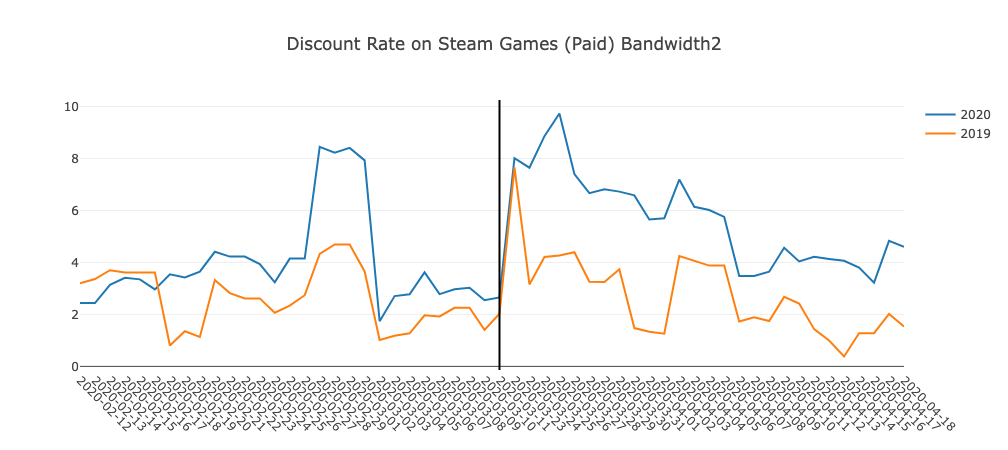

In [22]:
treat_agg = band2_D_t.groupby("time").mean().reset_index()
control_agg = band2_D_c.groupby("time").mean().reset_index()
fig = px.line(title="Discount Rate on Steam Games (Paid) Bandwidth2")
fig.add_scatter(x = treat_agg["time_index"], y = treat_agg["discount_rate"], mode="lines",name="2020")
fig.add_scatter(x = control_agg["time_index"], y = control_agg["discount_rate"], mode="lines",name="2019")
fig.add_vline(x=66, name="COVID-19")

fig.update_xaxes(
    ticktext=list(treat_agg["time"].astype(str)),
    tickvals=list(treat_agg["time_index"]),
    tickangle=45
)

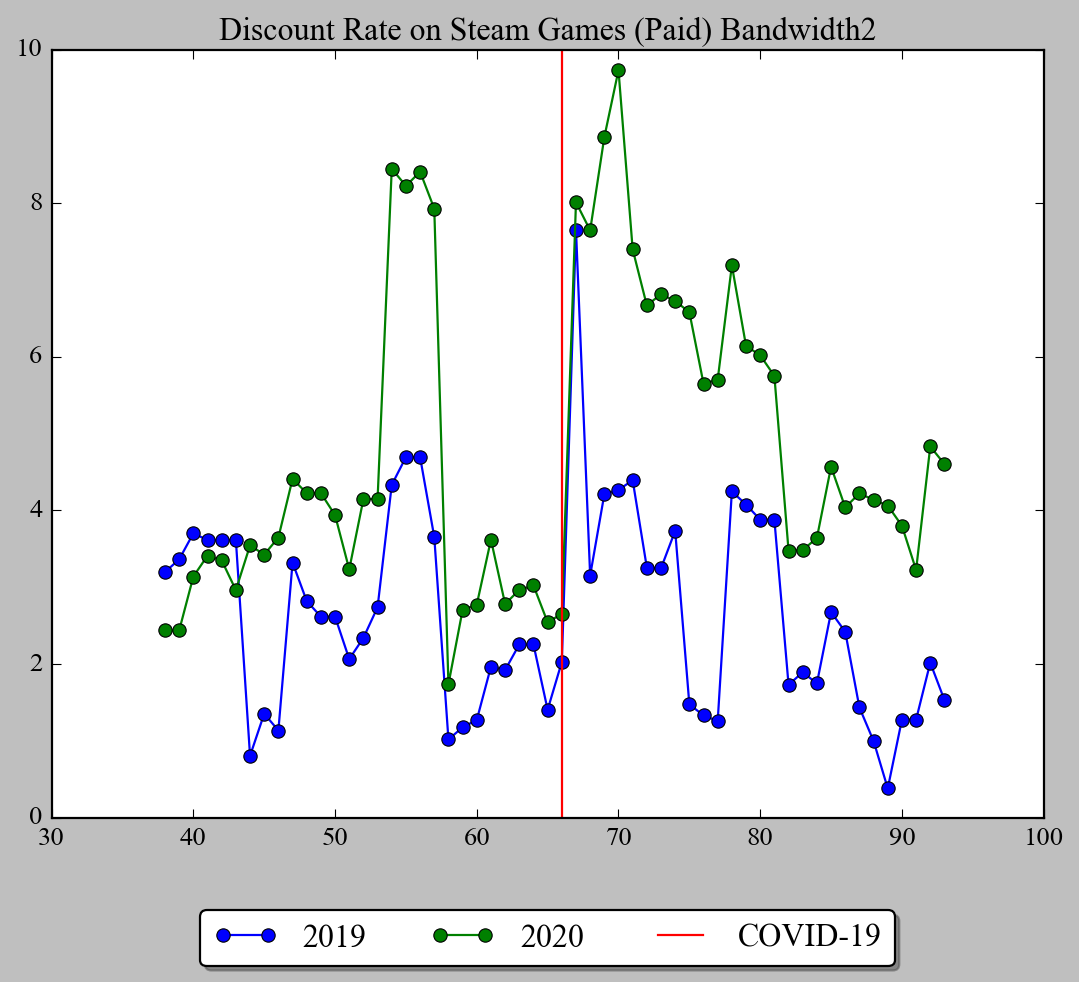

In [23]:
trend = draw_lineplots(control_agg,treat_agg, label=["2019","2020"],
                       title="Discount Rate on Steam Games (Paid) Bandwidth2",
                       dx="time_index",dy="discount_rate",vline=[66,"r","COVID-19"])

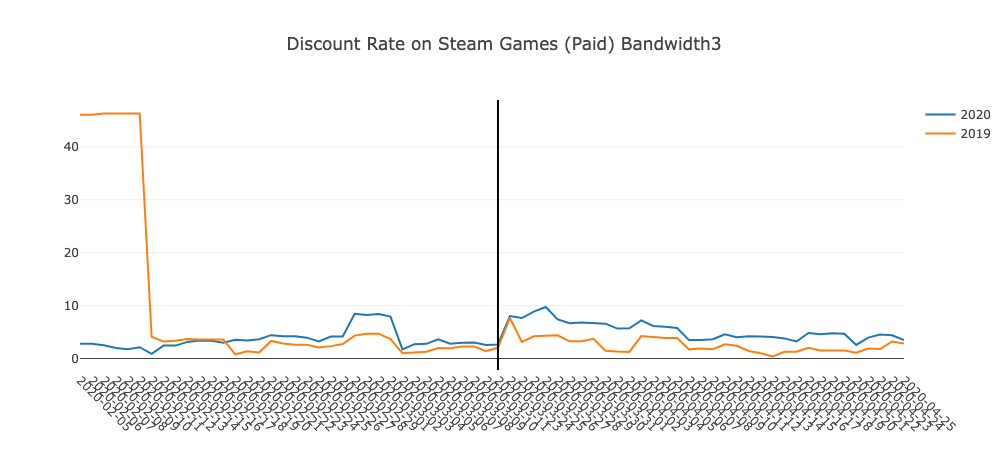

In [25]:
# This shows that Bandwidth3 might not estimate the coef significantly when dependent variable is discount rate.
treat_agg = band3_D_t.groupby("time").mean().reset_index()
control_agg = band3_D_c.groupby("time").mean().reset_index()
fig = px.line(title="Discount Rate on Steam Games (Paid) Bandwidth3")
fig.add_scatter(x = treat_agg["time_index"], y = treat_agg["discount_rate"], mode="lines",name="2020")
fig.add_scatter(x = control_agg["time_index"], y = control_agg["discount_rate"], mode="lines",name="2019")
fig.add_vline(x=66, name="COVID-19")

fig.update_xaxes(
    ticktext=list(treat_agg["time"].astype(str)),
    tickvals=list(treat_agg["time_index"]),
    tickangle=45
)

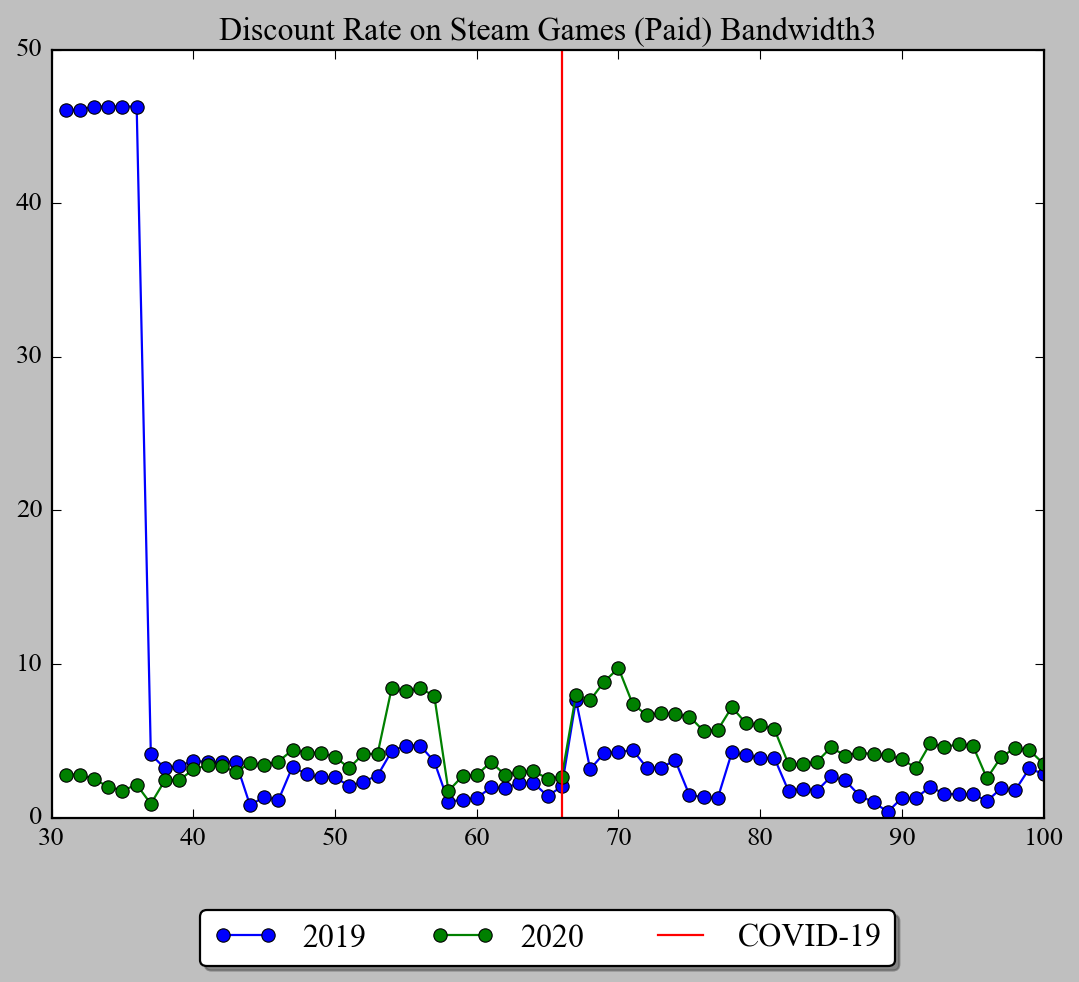

In [26]:
trend = draw_lineplots(control_agg,treat_agg, label=["2019","2020"],
                       title="Discount Rate on Steam Games (Paid) Bandwidth3",
                       dx="time_index",dy="discount_rate",vline=[66,"r","COVID-19"])

`Number of Players`

The overall trend before the COVID-19 declaration is similar. In other words, trends were sufficiently parallel between the year COVID-19 happen and the year before the pandemic declaration.

In [43]:
paid_games_ls= pd.read_pickle("paid_games_ls.pickle")
appdemand_2019_2020 = get_appdemand_before_after(period="D",week=30, date_point="2020-03-11")
appdemand_2018_2019 = get_appdemand_before_after(period="D",week=30, date_point="2019-03-13")
# filtering data, do not considering release_date(count new games)
appdemand_2019_2020_filter = filter_data(appdemand_2019_2020,release_date=["1980-12-20","2016-08-17"],current=100,review_num=5)
appdemand_2018_2019_filter = filter_data(appdemand_2018_2019,release_date=["1980-12-20","2016-08-17"],current=100,review_num=5)

appdemand_2019_2020_filter[appdemand_2019_2020_filter["appid"].isin(paid_games_ls)]
appdemand_2018_2019_filter[appdemand_2018_2019_filter["appid"].isin(paid_games_ls)]

time   appid     value  values_twitch  total_value  \
3616   2018-08-15  359550   96687.0        46168.0    4660787.0   
3617   2018-08-16  359550   95486.0        52812.0    4581612.0   
3618   2018-08-17  359550  115832.0       128067.0    4589063.0   
3619   2018-08-18  359550  130546.0       143275.0    5053112.0   
3620   2018-08-19  359550  135451.0       211067.0    5213811.0   
...           ...     ...       ...            ...          ...   
419789 2019-10-05    8190     748.0            7.0    4992630.0   
419790 2019-10-06    8190     830.0          255.0    5164002.0   
419791 2019-10-07    8190     582.0           30.0    4243908.0   
419792 2019-10-08    8190     544.0           20.0    4222176.0   
419793 2019-10-09    8190     473.0           26.0    4194811.0   

        total_values_twitch  market_share  market_share_twitch  
3616              1442960.0      0.020745             0.031995  
3617              1439586.0      0.020841             0.036686  
3618              1536952.0      0.025241             0.083325  
3619              1452760.0      0.025835             0.098623  
3620              1617823.0      0.025979             0.130464  
...                     ...           ...                  ...  
419789            1974648.0      0.000150             0.000004  
419790            1845536.0      0.000161             0.000138  
419791            1235263.0      0.000137             0.000024  
419792            1354040.0      0.000129             0.000015  
419793            1363005.0      0.000113             0.000019  

[82095 rows x 8 columns]

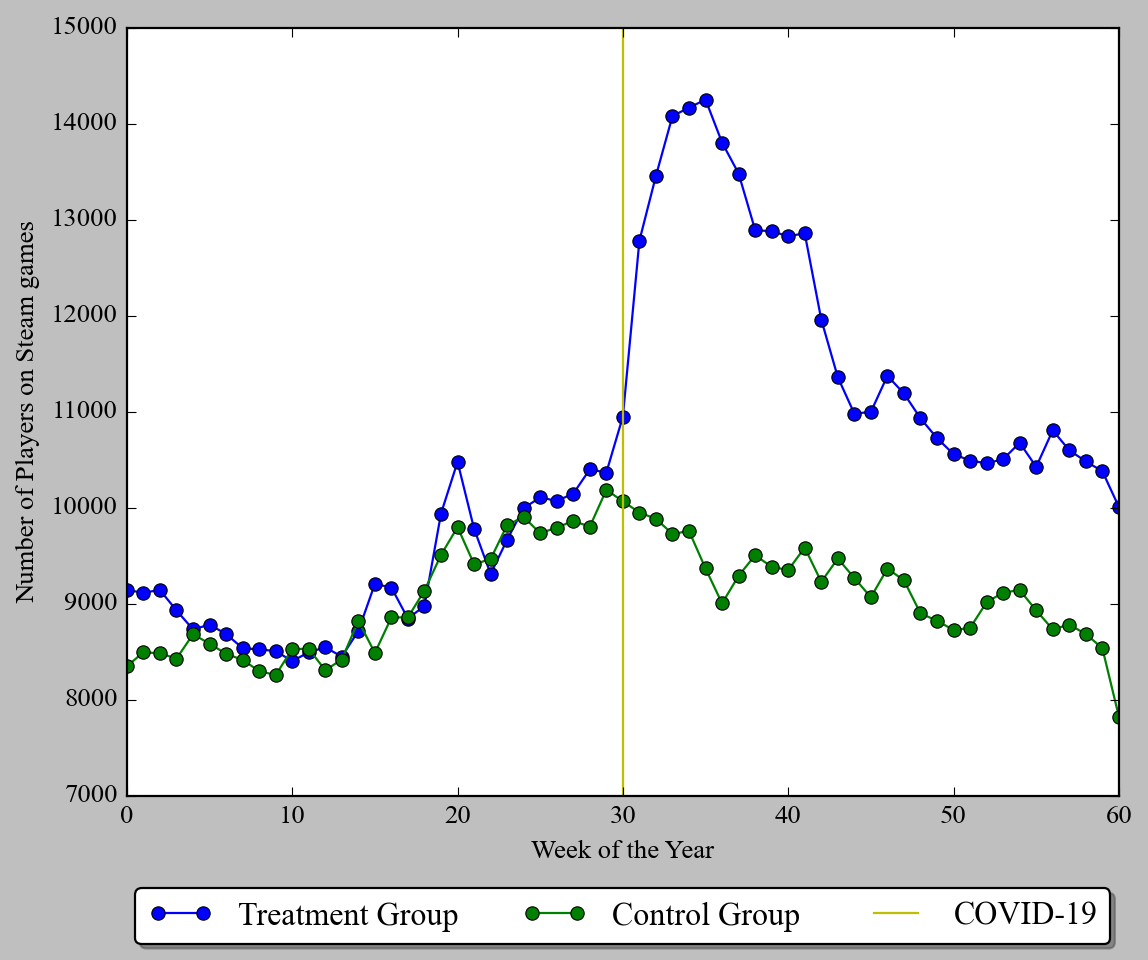

In [44]:
# resample data to week
appdemand_2019_2020_filter = appdemand_2019_2020_filter.resample("W",on="time").mean().reset_index()
appdemand_2018_2019_filter = appdemand_2018_2019_filter.resample("W",on="time").mean().reset_index()

appdemand_2019_2020_filter = make_time_index(appdemand_2019_2020_filter,"time")
appdemand_2018_2019_filter = make_time_index(appdemand_2018_2019_filter,"time")


# aggregate to see whole trend, total value is all same therefore aggregate with mean won't change any meaning
df_t = appdemand_2019_2020_filter.groupby("time")[["value","time_index"]].mean().reset_index()
df_c = appdemand_2018_2019_filter.groupby("time")[["value","time_index"]].mean().reset_index()


labels = ["Treatment Group","Control Group"]
vline = [30,"y","COVID-19"]
trendfig = draw_lineplots(df_t,df_c,
                          label=labels,
                          dx="time_index",dy="value",
                          xlabel="Week of the Year",
                          ylabel="Number of Players on Steam games",vline=vline)

#trendfig.savefig(fname="trendplot.png",transparent=True, bbox_inches='tight')

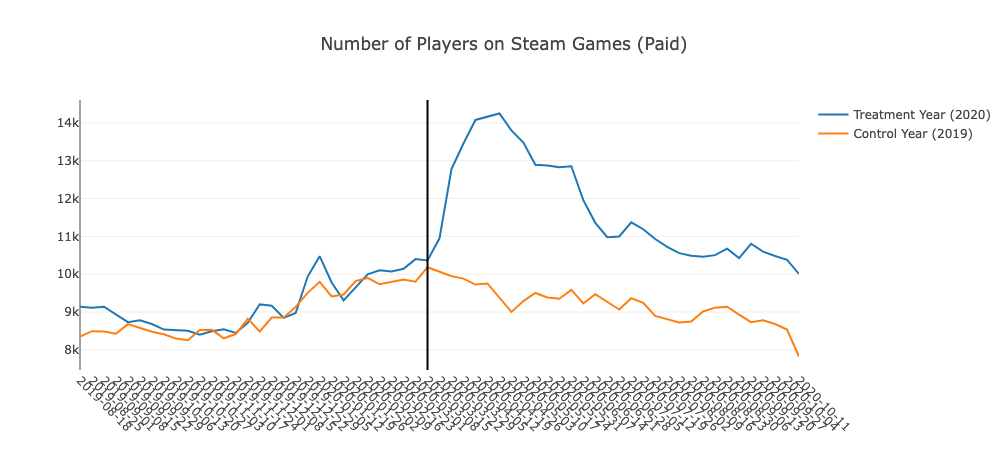

In [45]:
fig = px.line(title="Number of Players on Steam Games (Paid)")
fig.add_scatter(x = df_t["time_index"], y = df_t["value"], mode="lines",name="Treatment Year (2020)")
fig.add_scatter(x = df_c["time_index"], y = df_c["value"], mode="lines",name="Control Year (2019)")
fig.add_vline(x=29, name="COVID-19")

fig.update_xaxes(
    ticktext=list(df_t["time"].astype(str)),
    tickvals=list(df_t["time_index"]),
    tickangle=45
)

### Effects of COVID-19 on Demand for playing games

To quantify the differences, I used a before-and-after design that leverages observations in the year 2019 as a control group.  
One of the main interests is to measure the demand change due to COVID-19:

$$\text{Number of Players}_{ijt} = \alpha_i + \delta_t + \beta_{1}I(year = 2020)_{j} * After_{t} + \beta_{2}I(year = 2020)_{j} + \beta_{3}After_{t} + Covariates_{ijt} + \epsilon_{ijt} \tag{1} $$

- $i$ = 1,...,n indexes games
- $j$ indexes the year 2020 and the year 2019 as control
- $t$ indexes the day of the year
- $\text{Number of players}_{ijt}$ is the daily number of players of game $i$,year $j$, and day $t$
- $I(year = 2020)_{j}$ indicates 1 if the year is 2020, 0 otherwise (it's the variable named "Treated" on data)
- $After_{t}$ indicates 1 if the day of the year $t$ is later than COVID-19 declaration day (March 11th), 0 other wise
- $\alpha_i$ is a set of game fixed effects to control unobserved characteristics
- $\delta_t$ is a time fixed effects to controll all time unit-spcific effects
- $\epsilon_{ijt}$ is an error term clustered at the game level

The covariates include a number of twitch viewers, updates, a number of reviews, price, discount rate, and interaction between price and discount rate. The interaction between price and discount rate is to consider the role of sale signs. Consumers would respond more to a price with a discount tag on, and the more the discount rate is increased, the impact is also increased (Anderson & Simester, 1998).

- $\beta_1$ captures the impact of the COVID-19 pandemic on game demand  
As seen from the results, the coefficients are positive and significant. The magnitudes of these coefficients are unchaged across bandwidths. The impact of COVID-19 increased the number of players by about 1,000 players after the pandemic declaration.

In [19]:
# Daily

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After + Treated + After + price:discount_rate + {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0442
                          coef       std  p-value                  report
Intercept            7665.8438  517.8330   0.0000  7665.8438*** (517.833)
Treated:After        1203.8905   96.0939   0.0000  1203.8905*** (96.0939)
price:discount_rate     0.0305    0.3855   0.9370        0.0305  (0.3855)
price                 -79.1694   19.7409   0.0001   -79.1694*** (19.7409)
discount_rate           4.7029    2.4990   0.0599         4.7029* (2.499)
values_twitch           0.1810    0.0358   0.0000       0.181*** (0.0358)
update                -99.4894  333.9473   0.7658    -99.4894  (333.9473)
num_of_reviews         95.5181   59.2975   0.1072      95.5181  (59.2975)
--------------------------------------------------
--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     692.0        38006             

### EVENT STUDY

To see whether a policy (COVID-19 lockdown) shock actually causes a change in the number of game players, the event study for investigation of the effect of COVID-19 have been implemented.

$$\text{Number of Players}_{ijt} = \alpha_i + \delta_t + \sum_{\tau=0}^{4}\gamma_{-\tau}After_{jt} +  \sum_{\tau=1}^{19}\gamma_{+\tau}After_{jt} +  \delta_t + \sum_{\tau=0}^{4}\beta_{-\tau}After_{jt}I(year = 2020)_{j}+ + \sum_{\tau=1}^{19}\beta_{+\tau}After_{jt}I(year = 2020)_{j} +Covariates_{ijt} + \epsilon_{ijt}  \tag{2} $$


- $i$ = 1,...,n indexes games
- $j$ indexes the year 2020 and the year 2019 as control
- $t$ indexes the day of the year
- $\text{Number of players}_{ijt}$ is the daily number of players of game $i$,year $j$, and day $t$
- $I(year = 2020)_{j}$ indicates 1 if the year is 2020, 0 otherwise (it's the variable named "Treated" on data)
- $After_{jt}$ indicates 1 if current week $t$ is $\tau$ number of weeks befre and after invervention and 0 otherwise
- $\alpha_i$ is a set of game fixed effects to control unobserved characteristics
- $\delta_t$ is a time fixed effects to controll all time unit-spcific effects
- $\epsilon_{ijt}$ is an error term clustered at the game level

Given that $After_{jt}$ changes at different times in the different groups, the coefficients for $After_{jt}*I(year=2020)_{j}$ are the coefficients to test whether COVID-19 actually causes a change.  

the estimates show no effects in the 4 time periods before COVID-19 which is the number of players are not significantly different across the year 2020 and control (the year 2019). This confirms the parallel trend assumption again. Besides, after passing intervention, there are sharply increasing effects in the first few time periods after COVID-19 then the effects fade as time passes.

In [48]:
eventstudy_df = load_did_data("D",bumper = False)

In [49]:
# time_index 65 = 2020-03-11, COVID-19 lockdown shock
eventstudy_df = eventstudy_df[(eventstudy_df["time_index"] >= 36)&(eventstudy_df["time_index"] < 200)]

In [50]:
for i in range(37,200,7):
    eventstudy_df = make_event_dummy(eventstudy_df,i).rename(columns=lambda x: x.replace('-', 'm'))
    # not to include minus sign for using panelols

In [51]:
# event study
# Made it clear to see the expression
# drop m1 for reference
import linearmodels as lm

lead_lag = "After_m4 + After_m3 + After_m2 + After_0 + After_1 + After_2 + After_3 + After_4 + After_5 + After_6 + After_7 + After_8 + After_9 + After_10 + After_11 + After_12 + After_13 + After_14 + After_15 + After_16 + After_17 + After_18 + After_19"
lead_lagxTreated = "Treated:After_m4 + Treated:After_m3 + Treated:After_m2 + Treated:After_0 + Treated:After_1 + Treated:After_2 + Treated:After_3 + Treated:After_4 + Treated:After_5 + Treated:After_6 + Treated:After_7 + Treated:After_8 + Treated:After_9 + Treated:After_10 + Treated:After_11 + Treated:After_12 + Treated:After_13 + Treated:After_14 + Treated:After_15 + Treated:After_16 + Treated:After_17 + Treated:After_18 + Treated:After_19"

Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

formula = f"value ~ {lead_lagxTreated} + {lead_lag} + Treated + price:discount_rate + {Covariates} + 1 + EntityEffects + TimeEffects"

mod = lm.PanelOLS.from_formula(formula, data=eventstudy_df.set_index(["appid","time_index"]), drop_absorbed=True)
res = mod.fit(cov_type='robust',cluster_entity=True)

In [52]:
granger_result_df = pd.DataFrame({"coef":res.params,
                          "std":res.std_errors,
                          "pvalue":res.pvalues})
# .reset_index().rename(columns={"index":"params"})
# Scale standard error to 95% CI
granger_result_df['ci'] = granger_result_df['std']*1.96
granger_result_df = granger_result_df[1:24]
granger_result_df

coef         std        pvalue          ci
Treated:After_m4  -311.791319  259.082808  2.288076e-01  507.802304
Treated:After_m3  -213.298251  237.904154  3.699491e-01  466.292143
Treated:After_m2   -95.149675  202.991539  6.392584e-01  397.863417
Treated:After_0    349.543493  194.185773  7.185590e-02  380.604115
Treated:After_1   1192.254851  209.307208  1.228132e-08  410.242128
Treated:After_2   1012.757128  225.420080  7.037732e-06  441.823357
Treated:After_3   1579.952518  287.521565  3.913848e-08  563.542268
Treated:After_4   1134.961047  214.885300  1.282224e-07  421.175187
Treated:After_5    713.406528  177.282806  5.722699e-05  347.474300
Treated:After_6    856.005740  172.129959  6.601419e-07  337.374719
Treated:After_7    310.440181  157.472924  4.868199e-02  308.646932
Treated:After_8    214.969770  156.193736  1.687308e-01  306.139722
Treated:After_9    769.918663  277.534166  5.535691e-03  543.966965
Treated:After_10   550.157860  270.578568  4.202812e-02  530.333993
Treated:After_11    64.628487  217.251204  7.660985e-01  425.812360
Treated:After_12    -7.707647  192.943890  9.681350e-01  378.170025
Treated:After_13  -307.502148  191.087262  1.075702e-01  374.531033
Treated:After_14  -238.681797  202.942381  2.395549e-01  397.767067
Treated:After_15  -106.771372  197.975649  5.896701e-01  388.032272
Treated:After_16  -242.984711  196.806158  2.169672e-01  385.740069
Treated:After_17  -349.740059  218.283886  1.091085e-01  427.836416
Treated:After_18  -140.790880  247.502721  5.694619e-01  485.105334
Treated:After_19   -71.354269  365.845939  8.453627e-01  717.058041

In [53]:
# after reset_index, change col name: week estimator 
granger_result_df = granger_result_df.reset_index().rename(columns={"index":"params"})

granger_result_df["lead_lag"] = granger_result_df["params"].apply(lambda x: x.replace("Treated:After_",""))
granger_result_df["lead_lag"] = granger_result_df["lead_lag"].apply(lambda x: x.replace("m","-"))
granger_result_df["lead_lag"] = granger_result_df["lead_lag"].astype(int)

In [54]:
# add m1 with no parms
granger_result_df = granger_result_df.append({"params":"Treated:After_m1",
                          "coef":0,"std":0,"pvalue":0,
                          "ci":0,"lead_lag":-1},ignore_index=True).sort_values("lead_lag")
granger_result_df

params         coef         std        pvalue          ci  \
0   Treated:After_m4  -311.791319  259.082808  2.288076e-01  507.802304   
1   Treated:After_m3  -213.298251  237.904154  3.699491e-01  466.292143   
2   Treated:After_m2   -95.149675  202.991539  6.392584e-01  397.863417   
23  Treated:After_m1     0.000000    0.000000  0.000000e+00    0.000000   
3    Treated:After_0   349.543493  194.185773  7.185590e-02  380.604115   
4    Treated:After_1  1192.254851  209.307208  1.228132e-08  410.242128   
5    Treated:After_2  1012.757128  225.420080  7.037732e-06  441.823357   
6    Treated:After_3  1579.952518  287.521565  3.913848e-08  563.542268   
7    Treated:After_4  1134.961047  214.885300  1.282224e-07  421.175187   
8    Treated:After_5   713.406528  177.282806  5.722699e-05  347.474300   
9    Treated:After_6   856.005740  172.129959  6.601419e-07  337.374719   
10   Treated:After_7   310.440181  157.472924  4.868199e-02  308.646932   
11   Treated:After_8   214.969770  156.193736  1.687308e-01  306.139722   
12   Treated:After_9   769.918663  277.534166  5.535691e-03  543.966965   
13  Treated:After_10   550.157860  270.578568  4.202812e-02  530.333993   
14  Treated:After_11    64.628487  217.251204  7.660985e-01  425.812360   
15  Treated:After_12    -7.707647  192.943890  9.681350e-01  378.170025   
16  Treated:After_13  -307.502148  191.087262  1.075702e-01  374.531033   
17  Treated:After_14  -238.681797  202.942381  2.395549e-01  397.767067   
18  Treated:After_15  -106.771372  197.975649  5.896701e-01  388.032272   
19  Treated:After_16  -242.984711  196.806158  2.169672e-01  385.740069   
20  Treated:After_17  -349.740059  218.283886  1.091085e-01  427.836416   
21  Treated:After_18  -140.790880  247.502721  5.694619e-01  485.105334   
22  Treated:After_19   -71.354269  365.845939  8.453627e-01  717.058041   

    lead_lag  
0         -4  
1         -3  
2         -2  
23        -1  
3          0  
4          1  
5          2  
6          3  
7          4  
8          5  
9          6  
10         7  
11         8  
12         9  
13        10  
14        11  
15        12  
16        13  
17        14  
18        15  
19        16  
20        17  
21        18  
22        19

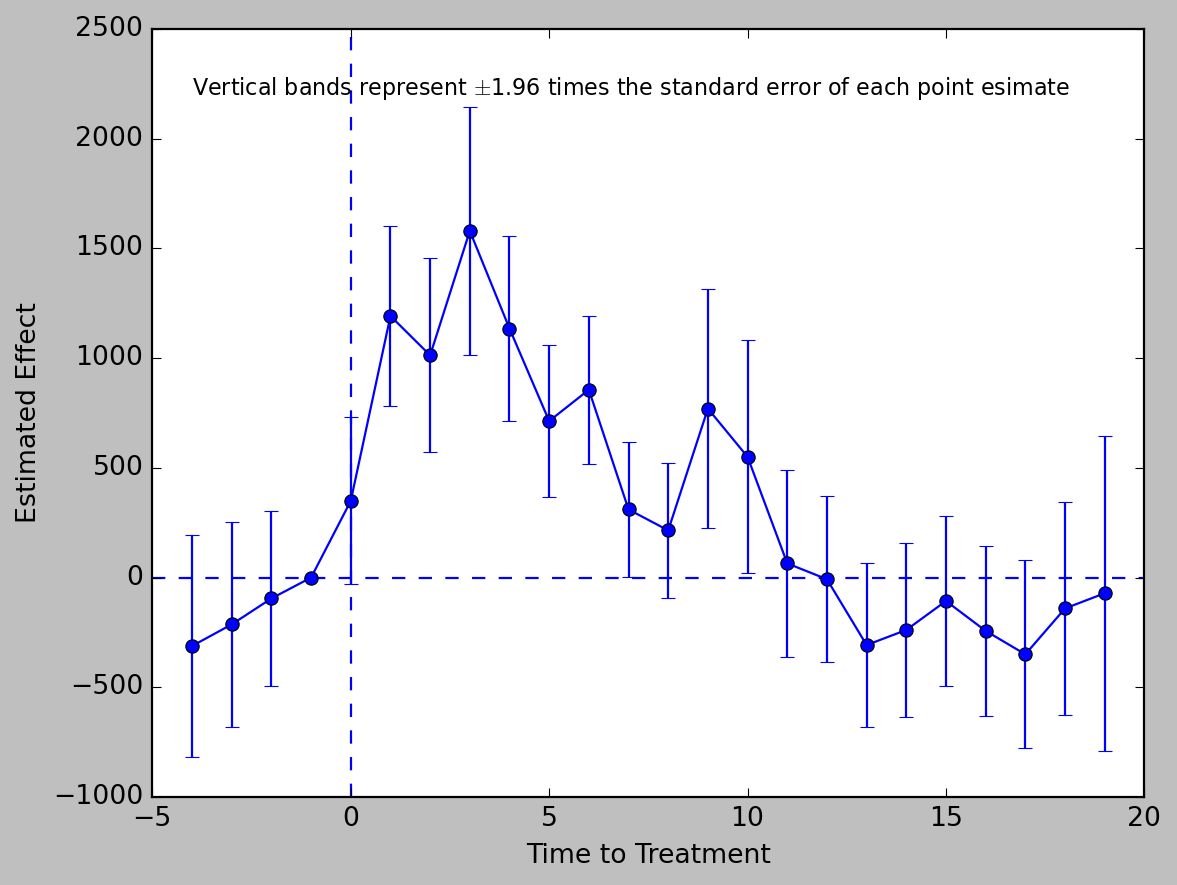

In [55]:
# Plot the estimates as connected lines with error bars
plt.style.use(["classic"])

fig, ax = plt.subplots() # figsize=(13,10)

ax.text(-4,2200,"Vertical bands represent $\pm$1.96 times the standard error of each point esimate", fontsize=10)
ax.errorbar(granger_result_df["lead_lag"],granger_result_df["coef"],yerr=granger_result_df["ci"], marker="o", label = "coef")

ax.set_xlabel("Time to Treatment")
ax.set_ylabel("Estimated Effect")

# Add a horizontal line at 0
ax.axhline(0, linestyle='dashed')
# And a vertical line at the treatment time
ax.axvline(0, linestyle='dashed')

#fig.savefig(fname= "Eventstudy.png", transparent=True)



### Three-way interaction: Impact on Multi-paly game after COVID-19

Equation (1) only uses variations that cannot identify characteristics of games that do not change over time. Thus. it is worth checking if there is any heterogeneity in the impact of COVID-19. Based on studies that there is an increase in FoMO levels during COVID-19 lockdown and consumer’s needs for digital technology to interact with others, games that can play with others would get the most benefit. To test this, using a three-way interaction as follow: 

$$ \text{Number of Players}_{ijtg} = \alpha_i + \delta_t + \gamma_g + \beta_1 I(year = 2020)_{j} * After_t * Multi_g + \beta_2 I(year = 2020)_{j} * Multi_g + \beta_3 After_t*Multi_g + \beta_4 I(year = 2020)_{j} * After_t + \beta_5I(year = 2020)_{j} + \beta_6After_t + \beta_7Multi_g + Covariates_{ijtg} + \epsilon_{ijtg} \tag{3}$$


- $i$ = 1,...,n indexes games
- $j$ indexes the year 2020 and the year 2019 as control
- $t$ indexes the day of the year
- $\text{Number of players}_{ijt}$ is the daily number of players of game $i$,year $j$, and day $t$
- $I(year = 2020)_{j}$ indicates 1 if the year is 2020, 0 otherwise (it's the variable named "Treated" on data)
- $After_{t}$ indicates 1 if the day of the year $t$ is later than COVID-19 declaration day (March 11th), 0 otherwise
- $Multi_g$ indicates 1 if game is multi-playable, 0 otherwise (it's the variable named "playwithother")
- $\alpha_i$ is a set of game fixed effects to control unobserved characteristics
- $\delta_t$ is a time fixed effects to controll all time unit-spcific effects
- $\epsilon_{ijt}$ is an error term clustered at the game level


In [20]:
# day

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:playwithother + Treated:playwithother + After:playwithother + Treated:After + Treated + After + price:discount_rate + {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0461
                                  coef       std  p-value  \
Intercept                    7710.2045  516.0546   0.0000   
Treated:After:playwithother  1045.3711  150.0426   0.0000   
After:playwithother          -120.2287   86.7202   0.1656   
Treated:After                 506.1359   50.8081   0.0000   
price:discount_rate             0.0490    0.3853   0.8989   
price                         -79.2369   19.7240   0.0001   
discount_rate                   4.3400    2.4925   0.0817   
values_twitch                   0.1806    0.0358   0.0000   
update                       -104.8558  334.1028   0.7536   
num_of_reviews                100.5706   59.7616   0.0924   

                                              report  
Intercept                    7710.2045*** (516.0546)  
Treated:After:playwithother  1045.3711*** (150.0426)  
After:playwithothe

### Three-way interaction: Impact on other charateristics after COVID-19

In [21]:
# bigpublishers

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:bigpublishers + Treated:bigpublishers + After:bigpublishers + Treated:After + Treated + After + price:discount_rate + {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0443
                                  coef       std  p-value  \
Intercept                    7640.9930  518.0223   0.0000   
Treated:After:bigpublishers   217.5645  168.5663   0.1968   
After:bigpublishers            39.8801   97.7415   0.6833   
Treated:After                1128.0616  138.6623   0.0000   
price:discount_rate             0.0345    0.3859   0.9289   
price                         -78.4962   19.7535   0.0001   
discount_rate                   4.8816    2.4913   0.0501   
values_twitch                   0.1809    0.0359   0.0000   
update                        -98.7568  333.9402   0.7674   
num_of_reviews                 95.7977   59.6535   0.1083   

                                              report  
Intercept                     7640.993*** (518.0223)  
Treated:After:bigpublishers     217.5645  (168.5663)  
After:bigpublisher

In [22]:
# Action

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:Action + Treated:Action + After:Action + Treated:After + Treated + After + price:discount_rate + {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0436
                           coef       std  p-value                   report
Intercept             7631.3503  517.2198   0.0000  7631.3503*** (517.2198)
Treated:After:Action  -234.3146  184.5782   0.2043    -234.3146  (184.5782)
After:Action           182.6490  108.0619   0.0910      182.649* (108.0619)
Treated:After         1329.5421   70.4810   0.0000    1329.5421*** (70.481)
price:discount_rate      0.0197    0.3855   0.9592         0.0197  (0.3855)
price                  -79.7209   19.7500   0.0001      -79.7209*** (19.75)
discount_rate            4.5937    2.4987   0.0660         4.5937* (2.4987)
values_twitch            0.1810    0.0359   0.0000        0.181*** (0.0359)
update                -100.2181  333.9226   0.7641    -100.2181  (333.9226)
num_of_reviews          95.4988   59.3344   0.1075       95.4988  (59.3344)
-------------------

In [23]:
# Indie 

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:Indie + Treated:Indie + After:Indie + Treated:After + Treated + After + price:discount_rate + {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0442
                          coef       std  p-value                   report
Intercept            7654.4756  518.0442   0.0000  7654.4756*** (518.0442)
Treated:After:Indie  -234.1344  181.3827   0.1968    -234.1344  (181.3827)
After:Indie            47.1257   99.3178   0.6352       47.1257  (99.3178)
Treated:After        1295.8919  137.8435   0.0000  1295.8919*** (137.8435)
price:discount_rate     0.0305    0.3856   0.9371         0.0305  (0.3856)
price                 -79.0963   19.7340   0.0001     -79.0963*** (19.734)
discount_rate           4.6925    2.4993   0.0605         4.6925* (2.4993)
values_twitch           0.1809    0.0358   0.0000       0.1809*** (0.0358)
update                -99.6527  334.0392   0.7655     -99.6527  (334.0392)
num_of_reviews         95.0942   59.3310   0.1090        95.0942  (59.331)
------------------------------

In [24]:
# Strategy

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:Strategy + Treated:Strategy + After:Strategy + Treated:After + Treated + After + price:discount_rate + {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0449
                             coef       std  p-value                   report
Intercept               7731.5312  519.5895   0.0000  7731.5312*** (519.5895)
Treated:After:Strategy   499.4145  163.4948   0.0023   499.4145*** (163.4948)
After:Strategy          -303.5500   96.1497   0.0016     -303.55*** (96.1497)
Treated:After           1048.6814  133.7456   0.0000  1048.6814*** (133.7456)
price:discount_rate        0.0180    0.3856   0.9628          0.018  (0.3856)
price                    -79.8137   19.7556   0.0001    -79.8137*** (19.7556)
discount_rate              4.5936    2.5004   0.0662         4.5936* (2.5004)
values_twitch              0.1809    0.0359   0.0000       0.1809*** (0.0359)
update                   -98.7456  334.0712   0.7676     -98.7456  (334.0712)
num_of_reviews            96.2555   59.4572   0.1055       96.2555  (59.457

In [25]:
# Adventure

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:Adventure + Treated:Adventure + After:Adventure + Treated:After + Treated + After + price:discount_rate + {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0445
                              coef       std  p-value                  report
Intercept                7695.4357  517.7850   0.0000  7695.4357*** (517.785)
Treated:After:Adventure  -394.2936  299.9492   0.1887   -394.2936  (299.9492)
After:Adventure            -6.0242  182.8091   0.9737     -6.0242  (182.8091)
Treated:After            1320.5618   68.1754   0.0000  1320.5618*** (68.1754)
price:discount_rate         0.0069    0.3849   0.9857        0.0069  (0.3849)
price                     -80.2393   19.7417   0.0000   -80.2393*** (19.7417)
discount_rate               4.6342    2.4993   0.0637        4.6342* (2.4993)
values_twitch               0.1806    0.0359   0.0000      0.1806*** (0.0359)
update                   -102.7564  333.6934   0.7581   -102.7564  (333.6934)
num_of_reviews             95.5686   59.4174   0.1078      95.5686  (59.417

In [26]:
# Casual

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:Casual + Treated:Casual + After:Casual + Treated:After + Treated + After + price:discount_rate +  {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0442
                           coef       std  p-value                   report
Intercept             7658.1426  518.0782   0.0000  7658.1426*** (518.0782)
Treated:After:Casual     3.8460  178.3668   0.9828        3.846  (178.3668)
After:Casual           181.2882   87.2730   0.0378      181.2882** (87.273)
Treated:After         1203.2110  103.7805   0.0000   1203.211*** (103.7805)
price:discount_rate      0.0297    0.3854   0.9385         0.0297  (0.3854)
price                  -79.1420   19.7407   0.0001     -79.142*** (19.7407)
discount_rate            4.7246    2.4989   0.0587         4.7246* (2.4989)
values_twitch            0.1811    0.0359   0.0000       0.1811*** (0.0359)
update                -101.2009  333.8240   0.7618     -101.2009  (333.824)
num_of_reviews          95.5562   59.2888   0.1070       95.5562  (59.2888)
-------------------

In [27]:
# Simulation

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:Simulation + Treated:Simulation + After:Simulation + Treated:After + Treated + After + price:discount_rate +  {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0447
                               coef       std  p-value  \
Intercept                 7661.8799  519.1573   0.0000   
Treated:After:Simulation   543.0701  163.3681   0.0009   
After:Simulation           -30.7880   90.1467   0.7327   
Treated:After             1059.0762  127.1139   0.0000   
price:discount_rate          0.0397    0.3855   0.9180   
price                      -78.7987   19.7656   0.0001   
discount_rate                4.5825    2.4957   0.0663   
values_twitch                0.1804    0.0358   0.0000   
update                     -99.7908  333.9078   0.7651   
num_of_reviews              96.9287   59.5378   0.1035   

                                           report  
Intercept                 7661.8799*** (519.1573)  
Treated:After:Simulation   543.0701*** (163.3681)  
After:Simulation               -30.788  (90.1467)  
Treated:

In [28]:
# RPG

import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:RPG + Treated:RPG + After:RPG + Treated:After + Treated + After + price:discount_rate +  {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0443
                          coef       std  p-value                   report
Intercept            7659.2893  518.1322   0.0000  7659.2893*** (518.1322)
Treated:After:RPG      84.9525  190.1070   0.6550       84.9525  (190.107)
After:RPG               5.5872   93.0758   0.9521        5.5872  (93.0758)
Treated:After        1178.1012  121.3135   0.0000  1178.1012*** (121.3135)
price:discount_rate     0.0316    0.3856   0.9348         0.0316  (0.3856)
price                 -78.9581   19.7621   0.0001    -78.9581*** (19.7621)
discount_rate           4.7671    2.5103   0.0576         4.7671* (2.5103)
values_twitch           0.1811    0.0358   0.0000       0.1811*** (0.0358)
update                -99.5251  333.9251   0.7657     -99.5251  (333.9251)
num_of_reviews         95.6656   59.4636   0.1077       95.6656  (59.4636)
------------------------------

### Effects of COVID-19 on the discount rate for games

Game publishers could take more sale promotions during COVID-19 to take advantage of it. To quantify the effect, the same approach as Equation 1 with the dependent variable as the discount rate:


$$\text{Discount Rate}_{ijt} = \alpha_i + \delta_t + \beta_{1}I(year = 2020)_{j} * After_{t} + \beta_{2}I(year = 2020)_{j} + \beta_{3}After_{t} + Covariates_{ijt} + \epsilon_{ijt} \tag{4} $$

- $i$ = 1,...,n indexes games
- $j$ indexes the year 2020 and the year 2019 as control
- $t$ indexes the day of the year
- $\text{Discount Rate}_{ijt}$ is the daily discount rate of game $i$,year $j$, and day $t$
- $I(year = 2020)_{j}$ indicates 1 if the year is 2020, 0 otherwise (it's the variable named "Treated" on data)
- $After_{t}$ indicates 1 if the day of the year $t$ is later than COVID-19 declaration day (March 11th), 0 other wise
- $\alpha_i$ is a set of game fixed effects to control unobserved characteristics
- $\delta_t$ is a time fixed effects to controll all time unit-spcific effects
- $\epsilon_{ijt}$ is an error term clustered at the game level

The coefficients of $Treated_j * After_t$ are positive and significant. The magnitude of coefficients at (3) differs, this is because the bandwidth for (3) includes 5 weeks before and after the intervention, and the control group (the year 2019) contains the periodical sale but not for the treatment group (the year 2020). There are periodical (seasonal) sales in the game industry such as new year, lunar new year, summer, Black Friday, and Christmas. The periodical sale trend is similar between the two groups but the lunar new year sale schedule is slightly different (Appendix B). This is the reason why the coefficient for model (3) differs from others but I believe that models (1) and (2) show that there is an increase in discount rate after COVID-19 during the non-sale period. 

In [29]:
import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + update + num_of_reviews"

    formula = f"discount_rate ~ Treated:After + Treated + After + {Covariates} + 1 + EntityEffects + TimeEffects"

    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     765.0        31748             0.0018
                  coef     std  p-value              report
Intercept       3.7875  0.1141   0.0000  3.7875*** (0.1141)
Treated:After   1.0137  0.3174   0.0014  1.0137*** (0.3174)
update          1.1603  0.5418   0.0322   1.1603** (0.5418)
num_of_reviews -0.0753  0.0260   0.0038  -0.0753*** (0.026)
--------------------------------------------------
--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     767.0        42329             0.0019
                  coef     std  p-value              report
Intercept       3.3655  0.0959   0.0000  3.3655*** (0.0959)
Treated:After   1.4846  0.2720   0.0000   1.4846*** (0.272)
update          1.4417  0.4693   0.0021  1.4417*** (0.4693)
num_of_reviews -0.0431  0.0279   0.1218   -0.0431  (0.0279)
--------------------------------------------------
--------

### Three-way interaction with Discount Rate

This is to see the additional effect of discount rate after COVID-19


$$ \text{Number of Players}_{ijtg} = \alpha_i + \delta_t + \gamma_g + \beta_1 I(year = 2020)_{j} * After_t * DiscountRate_{ijt} + \beta_2 I(year = 2020)_{j} * DiscountRate_{ijt} + \beta_3 After_t*DiscountRate_{ijt} + \beta_4 I(year = 2020)_{j} * After_t + \beta_5I(year = 2020)_{j} + \beta_6After_t + \beta_7Multi_g + Covariates_{ijtg} + \epsilon_{ijtg} \tag{3}$$


- $i$ = 1,...,n indexes games
- $j$ indexes the year 2020 and the year 2019 as control
- $t$ indexes the day of the year
- $\text{Number of players}_{ijt}$ is the daily number of players of game $i$,year $j$, and day $t$
- $I(year = 2020)_{j}$ indicates 1 if the year is 2020, 0 otherwise (it's the variable named "Treated" on data)
- $After_{t}$ indicates 1 if the day of the year $t$ is later than COVID-19 declaration day (March 11th), 0 otherwise
- $DiscountRate_{ijt}$ is discount rate for game $i$,$j$, in time $t$
- $\alpha_i$ is a set of game fixed effects to control unobserved characteristics
- $\delta_t$ is a time fixed effects to controll all time unit-spcific effects
- $\epsilon_{ijt}$ is an error term clustered at the game level


In [46]:
# daily
import linearmodels as lm

models = [band1_D.set_index(["appid","time_index"]),
         band2_D.set_index(["appid","time_index"]),
         band3_D.set_index(["appid","time_index"])]


for model in models:

    Covariates = "Action + Indie + Strategy + Adventure + Casual + Simulation + RPG + bigpublishers + playwithother + released + price:discount_rate + price + discount_rate + values_twitch + update + num_of_reviews"

    formula = f"value ~ Treated:After:discount_rate + Treated:discount_rate + After:discount_rate + Treated:After + Treated + After + {Covariates} + 1 + EntityEffects + TimeEffects"
    mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True)
    res = mod.fit(cov_type='robust', cluster_entity=True)
    print("-"*50)
    print(summary_report(res)[0])
    print(summary_report(res)[1])
    print("-"*50)
    

--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     690.0        28511             0.0453
                                  coef       std  p-value  \
Intercept                    7677.4945  499.4460   0.0000   
Treated:After:discount_rate    21.0986    6.9833   0.0025   
Treated:discount_rate           0.6250    5.5479   0.9103   
After:discount_rate            -1.4286    3.6631   0.6965   
Treated:After                1086.3602   99.2829   0.0000   
price:discount_rate             0.0495    0.3759   0.8953   
price                         -78.3824   19.1440   0.0000   
discount_rate                  -3.2922    3.5030   0.3473   
values_twitch                   0.1809    0.0358   0.0000   
update                        -94.1224  333.8195   0.7780   
num_of_reviews                 96.5391   59.3332   0.1037   

                                             report  
Intercept                    7677.4945*** (499.446)  
Treated:After:

### Three-way interaction with Discount Rate in condition

- ex) Dataset only consists of multi games

In [47]:
genres = ['Action', 'Indie', 'Strategy', 'Adventure', 'Casual', 'Simulation', 'RPG','playwithother', 'bigpublishers']
bands = [band1_D, band2_D, band3_D]



for genre in genres:
    print("CONDITION: ",genre)
    for band in bands:
        model = band[band[genre]==1].set_index(["appid","time_index"])

        
        Covariates = "released + price:discount_rate + price + discount_rate + values_twitch + update + num_of_reviews"
        formula = f"value ~ Treated:After:discount_rate + Treated:discount_rate + After:discount_rate + Treated:After + Treated + After + {Covariates} + 1 + EntityEffects + TimeEffects"
        mod = lm.PanelOLS.from_formula(formula, data=model, drop_absorbed=True, check_rank=False)
        res = mod.fit(cov_type='robust', cluster_entity=True)
        print("-"*50)
        print(summary_report(res)[0])
        print(summary_report(res)[1])
        print("-"*50)

CONDITION:  Action
--------------------------------------------------
      Entities  obervations  R-squared(Within)
info     370.0        15295             0.0401
                                   coef       std  p-value  \
Intercept                    11424.9561  782.7722   0.0000   
Treated:After:discount_rate      7.8254   10.1620   0.4413   
Treated:discount_rate            9.9304    8.0788   0.2190   
After:discount_rate              3.4470    4.5913   0.4528   
Treated:After                 1000.8034  177.9409   0.0000   
price:discount_rate             -0.3821    0.5257   0.4674   
price                         -117.9754   28.8293   0.0000   
discount_rate                  -17.5067    5.6490   0.0019   
values_twitch                    0.1926    0.0448   0.0000   
update                        -716.9511  603.7364   0.2350   
num_of_reviews                 214.0112  111.9851   0.0560   

                                               report  
Intercept                    11424.